In [77]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [38]:
df = pd.read_csv('Sleep_Efficiency.csv')
df = df.dropna()
df['Smoking status'] = df['Smoking status'].map({'Yes': 1, 'No': 0})
df

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,1,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,1,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,1,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,446,30,Female,2021-11-16 23:00:00,2021-11-16 06:30:00,7.5,0.53,28,20,52,4.0,50.0,2.0,1,1.0
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,0,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,0,3.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,0,3.0


In [18]:
df.keys()

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

In [17]:
df.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,226.260309,40.829897,7.451031,0.789253,22.680412,52.822165,24.497423,1.618557,22.680412,1.146907,1.757732
std,129.578114,13.403187,0.883483,0.135706,3.430510,15.571518,15.309638,1.355958,28.997566,1.612793,1.447824
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,111.750000,29.000000,7.000000,0.700000,20.000000,51.000000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,228.500000,41.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,0.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,24.000000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


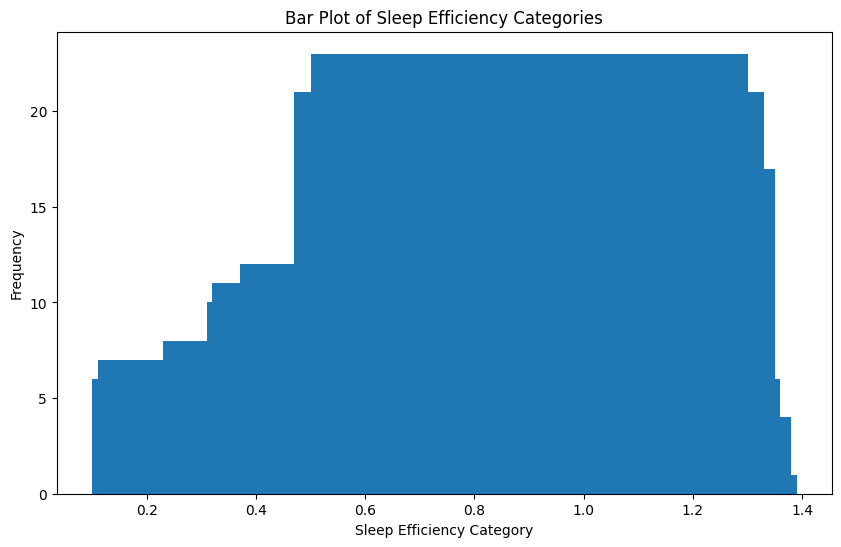

In [193]:
# Count the occurrences of each sleep efficiency category
category_counts = df['Sleep efficiency'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)

# Adding titles and labels
plt.title('Bar Plot of Sleep Efficiency Categories')
plt.xlabel('Sleep Efficiency Category')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [194]:
df['Efficiency Category'] = pd.qcut(df['Sleep efficiency'], q=3)

# Get the range of each bin
bin_ranges = df['Efficiency Category'].unique().sort_values()
print(bin_ranges)

[(0.499, 0.74], (0.74, 0.88], (0.88, 0.99]]
Categories (3, interval[float64, right]): [(0.499, 0.74] < (0.74, 0.88] < (0.88, 0.99]]


In [206]:
bins = [0.499, 0.74, 0.88, 0.99] # Define bins
labels = [0, 1, 2] # Define labels for the bins
df['Sleep efficiency class'] = pd.cut(df['Sleep efficiency'], bins=bins, labels=labels, include_lowest=True)

y = df['Sleep efficiency class'].astype(int)

In [196]:
X = df[['Age', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']]

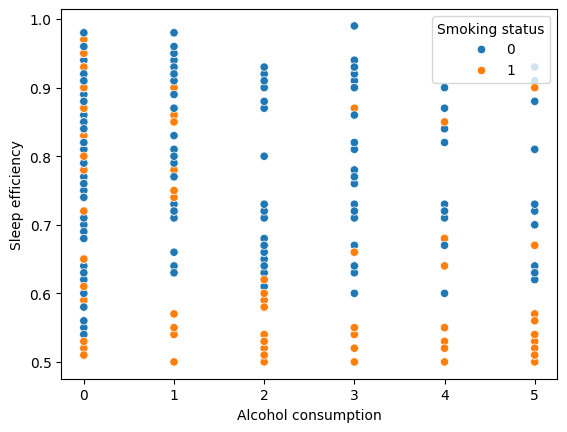

In [197]:
fig = sns.scatterplot(data=df, x='Alcohol consumption', y='Sleep efficiency', hue='Smoking status')

In [154]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [198]:
# Choosing k value and create k-NN classifier
knn1 = KNeighborsClassifier(n_neighbors = 1)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn8 = KNeighborsClassifier(n_neighbors = 8)
knn10 = KNeighborsClassifier(n_neighbors = 10)
knn12 = KNeighborsClassifier(n_neighbors = 12)
knn20 = KNeighborsClassifier(n_neighbors = 20)

In [199]:
# Training the model
knn1.fit(X_train, y_train)
knn3.fit(X_train, y_train)
knn5.fit(X_train, y_train)
knn8.fit(X_train, y_train)
knn10.fit(X_train, y_train)
knn12.fit(X_train, y_train)
knn20.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [200]:
y_pred_1 = knn1.predict(X_test)
y_pred_3 = knn3.predict(X_test)
y_pred_5 = knn5.predict(X_test)
y_pred_8 = knn8.predict(X_test)
y_pred_10 = knn10.predict(X_test)
y_pred_12 = knn12.predict(X_test)
y_pred_20 = knn20.predict(X_test)

In [202]:
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)
print("Accuracy with k=3", accuracy_score(y_test, y_pred_3)*100)
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=8", accuracy_score(y_test, y_pred_8)*100)
print("Accuracy with k=10", accuracy_score(y_test, y_pred_10)*100)
print("Accuracy with k=12", accuracy_score(y_test, y_pred_12)*100)
print("Accuracy with k=20", accuracy_score(y_test, y_pred_20)*100)

Accuracy with k=1 51.28205128205128
Accuracy with k=3 60.256410256410255
Accuracy with k=5 64.1025641025641
Accuracy with k=8 62.82051282051282
Accuracy with k=10 66.66666666666666
Accuracy with k=12 66.66666666666666
Accuracy with k=20 61.53846153846154
